# 一元线性回归

基本形式
$$\tag{1}
f(\mathbf{x}) = w_1 x_1 + w_2 x_2 + ... + w_d x_d + b
$$
向量形式
$$\tag{2}
f(\mathbf{x}) = \mathbf{w}^\mathrm{T}\mathbf{x}+b
$$
其中$\mathbf{w} = (w_1; w_2; ...; w_d)$.

针对一元线性回归，我们有
$$\tag{3}
f(x) = w x + b$$

## 1. 读取数据
数据处理包括：数据分析、清理，数据集划分等

In [2]:
import numpy as np 
import pandas as pd

数据说明：https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [3]:
# 使用pandas读取csv数据
data = pd.read_csv('C:/Users/苍山沐雪/Desktop/Jupyter/data//advertising/advertising.csv')
# 打印前5行
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


本题的要求是，针对TV,  Radio, Newspaper三个特征，使用训练集训练三个一元线性回归模型，对比其在测试集上的MAE和RMSE，并且要绘制曲线。

所以我们只保留这三列与标记这一列，总共四列的数据即可

In [4]:
# 保留有用数据
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
data = data[features + [target]]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. 打乱数据顺序

In [5]:
from sklearn.utils import shuffle

In [6]:
data_shuffled = shuffle(data, random_state = 32) # 这个32不要改变

In [7]:
data_shuffled.head()

,TV,Radio,Newspaper,Sales
122,224.0,2.4,15.6,16.6
186,139.5,2.1,26.6,10.3
167,206.8,5.2,19.4,17.2
101,296.4,36.3,100.9,23.8
29,70.6,16.0,40.8,10.5


## 3. 取前70%的数据为训练集，后30%为测试集

In [8]:
num_of_samples = data_shuffled.shape[0]
split_line = int(num_of_samples * 0.7)
train_data = data.iloc[:split_line]
test_data = data.iloc[split_line:]
data.shape

(200, 4)

In [9]:
train_data.shape

(140, 4)

In [10]:
test_data.shape

(60, 4)

## 4. 编写模型

我们以类(class)的形式编写这个模型，python中的类很简单，只不过这个类里面需要调用两个函数，一个是get_w，这个是计算模型w的函数，另一个是get_b，计算模型b的函数，需要大家来完成。

本实验要求使用最小二乘法求解一元线性回归模型  
求解$w$和$b$使均方误差$E_{(w,b)} = \sum^m_{i=1}(y_i - wx_i - b)^2$最小化的过程，称为线性回归模型的最小二乘“参数估计”(parameter estimation)。我们可将$E_{(w,b)}$分别对$w$和$b$求导，得到
$$\tag{4}
\frac{\partial E_{(w,b)}}{\partial w} = 2(w \sum^m_{i=1} x^2_i - \sum^m_{i=1} (y_i - b) x_i),
$$

$$\tag{5}
\frac{\partial E_{(w,b)}}{\partial b} = 2(mb - \sum^m_{i=1}(y_i - w x_i))
$$

然后令式(4)和式(5)为0，可得到$w$和$b$的闭式解(closed-form solution)
$$\tag{6}
w = \frac{\sum^m_{i=1} y_i(x_i - \bar{x})}{\sum^m_{i=1}x^2_i - \frac{1}{m}(\sum^m_{i=1}x_i)^2}
$$

$$\tag{7}
b = \frac{1}{m}\sum^m_{i=1}(y_i - w x_i)
$$
其中，$\bar{x} = \frac{1}{m}\sum^m_{i=1}x_i$为$x$的均值

首先编写求解w的函数，传入的参数就是x和y，都是np.ndarray类型的，或是pd.Series类型的（其实都一样）。我们需要大家在下面完成式(6)和式(7)的求解过程，将计算得到的w和b的值返回

In [11]:
def get_w(x, y):
    '''
    这个函数是计算模型w的值的函数，
    传入的参数分别是x和y，表示数据与标记
    
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
    
    Returns
    ----------
        w: float, 模型w的值
    '''
    
    # m表示样本的数量
    m = len(x)
    
    # 求x的均值
    x_mean = np.mean(x)
    
    # 求w的分子部分
    numerator = np.sum((x - x_mean) * y)
    
    # 求w的分母部分
    denominator = np.sum(x ** 2) - (np.sum(x) ** 2) / m
    
    # 求w
    w = numerator / denominator
    
    # 返回w
    return w

In [12]:
def get_b(x, y, w):
    '''
    这个函数是计算模型b的值的函数，
    传入的参数分别是x, y, w，表示数据，标记以及模型的w值
    
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记
        
        w: np.ndarray, pd.Series，模型w的值
    
    Returns
    ----------
        b: float, 模型b的值
    '''
    # 样本个数
    m = len(x)
    
    # 求b
    b = np.mean(y) - w * np.mean(x)
    
    # 返回b
    return b

下面这个类，就是一个最简单的一元线性回归的类，我们已经帮你实现好了三个方法

In [13]:
class myLinearRegression:
    def __init__(self):
        '''
        类的初始化方法，不需要初始化的参数
        这里设置了两个成员变量，用来存储模型w和b的值
        '''
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        '''
        这里需要编写训练的函数，也就是调用模型的fit方法，传入特征x的数据和标记y的数据
        这个方法就可以求解出w和b
        '''
        self.w = get_w(x, y)
        self.b = get_b(x, y, self.w)
        
    def predict(self, x):
        '''
        这是预测的函数，传入特征的数据，返回模型预测的结果
        '''
        if self.w == None or self.b == None:
            print("模型还未训练，请先调用fit方法训练")
            return 
        
        return self.w * x + self.b

## 5. 预测

In [14]:
# 创建一个模型的实例
model1 = myLinearRegression()

# 使用训练集对模型进行训练，传入训练集的TV和标记Sales
model1.fit(train_data['TV'], train_data['Sales'])

# 对测试集进行预测，并将结果存储在变量prediction中
prediction1 = model1.predict(test_data['TV'])

## 6. 性能度量

模型训练完成后，还需要在测试集上验证其预测能力，这就需要计算模型的一些性能指标，如MAE和RMSE等。

$$\tag{8}
MAE(\hat{y}, y) = \frac{1}{m} \sum^m_{i=1} \vert \hat{y} - y \vert
$$

$$\tag{9}
RMSE(\hat{y}, y) = \sqrt{\frac{1}{m} \sum^m_{i=1} (\hat{y} - y)^2}
$$
其中，$\hat{y}$是模型的预测值，$y$是真值，$m$是样本数

In [15]:
def MAE(y_hat, y):
        # 计算绝对误差
    absolute_errors = np.abs(y_hat - y)
    
    # 计算MAE
    mae = np.mean(absolute_errors)
    
    return mae

In [16]:
def RMSE(y_hat, y):
    # 计算平方误差
    squared_errors = (y_hat - y) ** 2
    
    # 计算均方根误差（RMSE）
    rmse = np.sqrt(np.mean(squared_errors))
    
    return rmse

在此计算出模型在测试集上的MAE与RMSE值

In [17]:
mae1 = MAE(prediction1, test_data['Sales'])
rmse1 = RMSE(prediction1, test_data['Sales'])
print("模型1，特征：TV")
print("MAE:", mae1)
print("RMSE:", rmse1)

模型1，特征：TV
MAE: 2.0971184391958335
RMSE: 2.583663454615892


## 7. 模型预测效果可视化

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

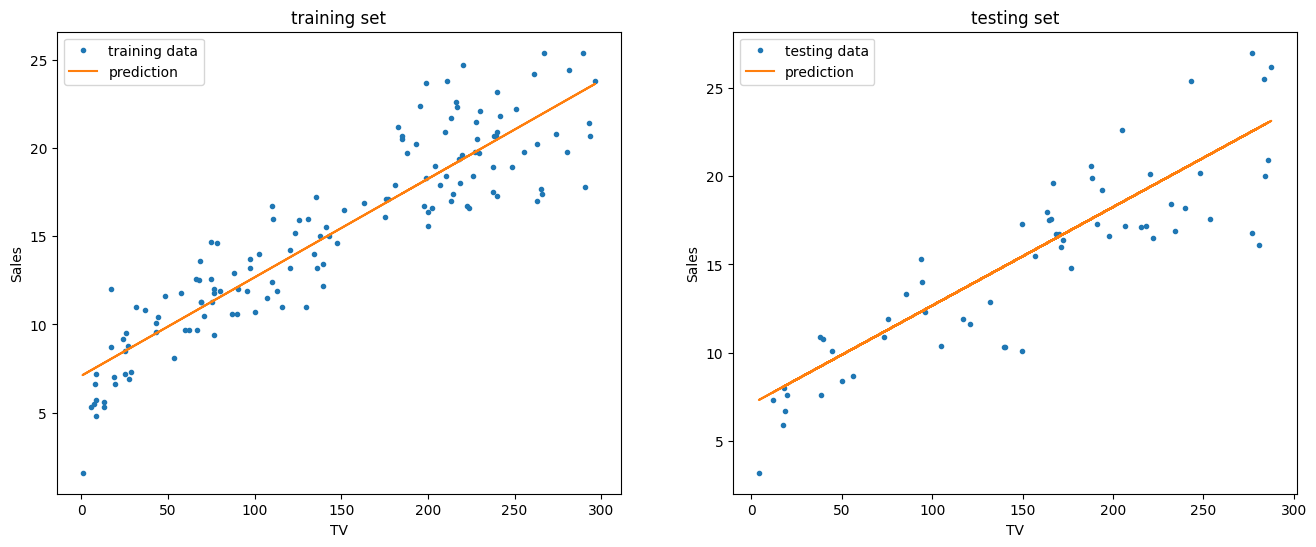

In [19]:
# 创建新的图
plt.figure(figsize = (16, 6))

# 创建子图1
plt.subplot(121) # 121分别代表，生成1行2列个图，这是第1个
# 其中的参数为横轴值，纵轴值，label为此条曲线的标签， '.' 表示画出的图的图形为散点图
plt.plot(train_data['TV'].values, train_data['Sales'].values, '.', label = 'training data')
# '-' 表示画出的图形为折线图
plt.plot(train_data['TV'].values, model1.predict(train_data['TV']), '-', label = 'prediction')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.title("training set")
plt.legend()

# 创建子图2
plt.subplot(122) # 121分别代表，生成1行2列个图，这是第2个
plt.plot(test_data['TV'].values, test_data['Sales'].values, '.', label = 'testing data')
plt.plot(test_data['TV'].values, prediction1, '-', label = 'prediction')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.title("testing set")
plt.legend()

### 通过左右两图的对比，分析该模型出现的问题，并给出能帮助模型更好的做预测的方案(选做)
###### 双击此处展开讨论






# 使用Radio作为特征，完成模型的训练，指标计算，可视化

模型2，特征：Radio
MAE: 4.193887603234602
RMSE: 4.832218230621112


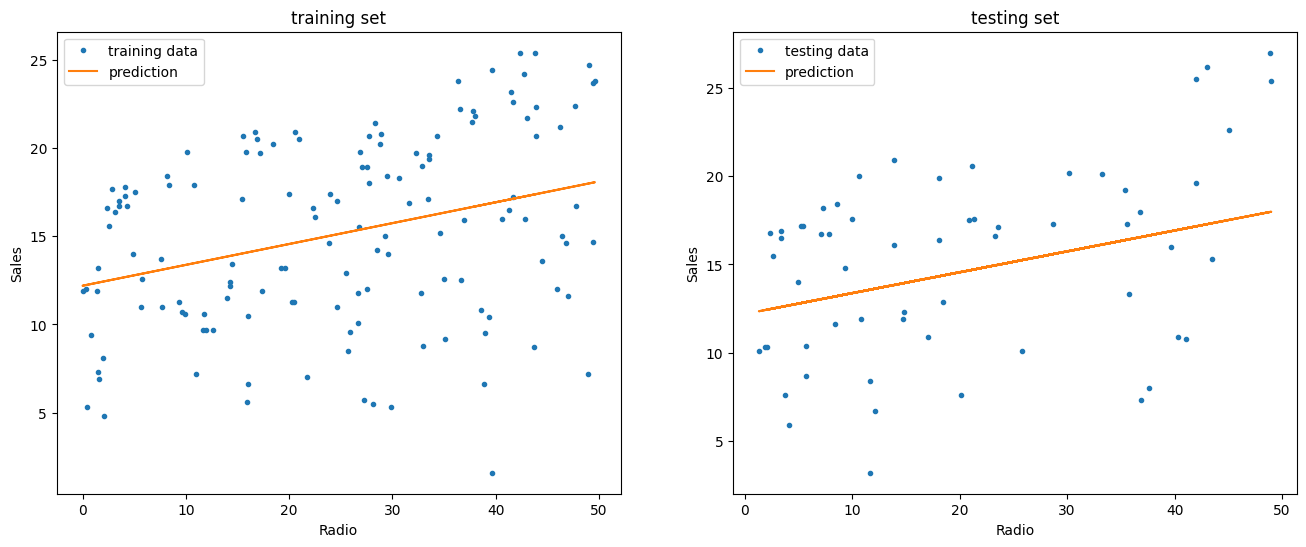

In [21]:
# 创建一个模型的实例
model2 = myLinearRegression()

# 使用训练集对模型进行训练，传入训练集的Radio和标记Sales
model2.fit(train_data['Radio'], train_data['Sales'])

# 对测试集进行预测，并将结果存储在变量prediction中
prediction2 = model2.predict(test_data['Radio'])

mae2 = MAE(prediction2, test_data['Sales'])
rmse2 = RMSE(prediction2, test_data['Sales'])

print("模型2，特征：Radio")
print("MAE:", mae2)
print("RMSE:", rmse2)

# 创建新的图
plt.figure(figsize=(16, 6))

# 创建子图1
plt.subplot(121)
plt.plot(train_data['Radio'].values, train_data['Sales'].values, '.', label='training data')
plt.plot(train_data['Radio'].values, model2.predict(train_data['Radio']), '-', label='prediction')
plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title("training set")
plt.legend()

# 创建子图2
plt.subplot(122)
plt.plot(test_data['Radio'].values, test_data['Sales'].values, '.', label='testing data')
plt.plot(test_data['Radio'].values, prediction2, '-', label='prediction')
plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title("testing set")
plt.legend()

plt.show()


# 使用Newspaper作为特征，完成模型的训练，指标计算，可视化

模型3，特征：Newspaper
MAE: 4.271028226622963
RMSE: 5.135100422395427


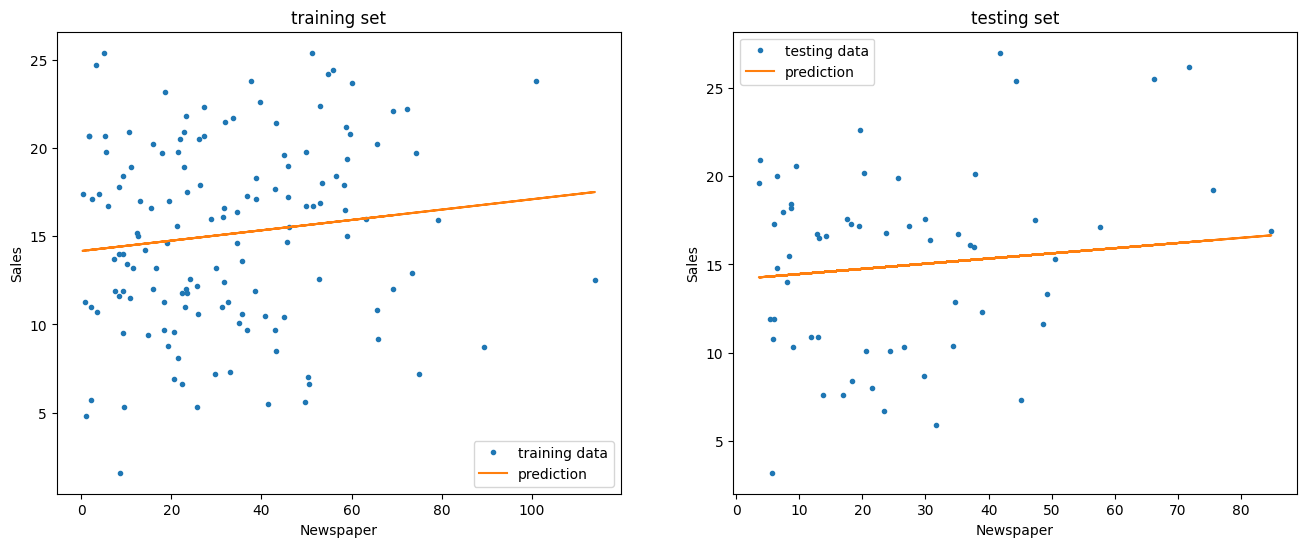

In [22]:
# YOUR CODE HERE
# 创建一个模型的实例
model3 = myLinearRegression()

# 使用训练集对模型进行训练，传入训练集的Newspaper和标记Sales
model3.fit(train_data['Newspaper'], train_data['Sales'])

# 对测试集进行预测，并将结果存储在变量prediction中
prediction3 = model3.predict(test_data['Newspaper'])

mae3 = MAE(prediction3, test_data['Sales'])
rmse3 = RMSE(prediction3, test_data['Sales'])

print("模型3，特征：Newspaper")
print("MAE:", mae3)
print("RMSE:", rmse3)

# 创建新的图
plt.figure(figsize=(16, 6))

# 创建子图1
plt.subplot(121)
plt.plot(train_data['Newspaper'].values, train_data['Sales'].values, '.', label='training data')
plt.plot(train_data['Newspaper'].values, model3.predict(train_data['Newspaper']), '-', label='prediction')
plt.xlabel("Newspaper")
plt.ylabel('Sales')
plt.title("training set")
plt.legend()

# 创建子图2
plt.subplot(122)
plt.plot(test_data['Newspaper'].values, test_data['Sales'].values, '.', label='testing data')
plt.plot(test_data['Newspaper'].values, prediction3, '-', label='prediction')
plt.xlabel("Newspaper")
plt.ylabel('Sales')
plt.title("testing set")
plt.legend()

plt.show()




# 选做：剔除训练集中的离群值(outlier)，然后重新训练模型，观察模型预测性能的变化
###### 提示：可以使用下面的代码处理数据

去除离群值后的模型，特征：Radio
MAE: 4.193887603234602
RMSE: 4.832218230621112


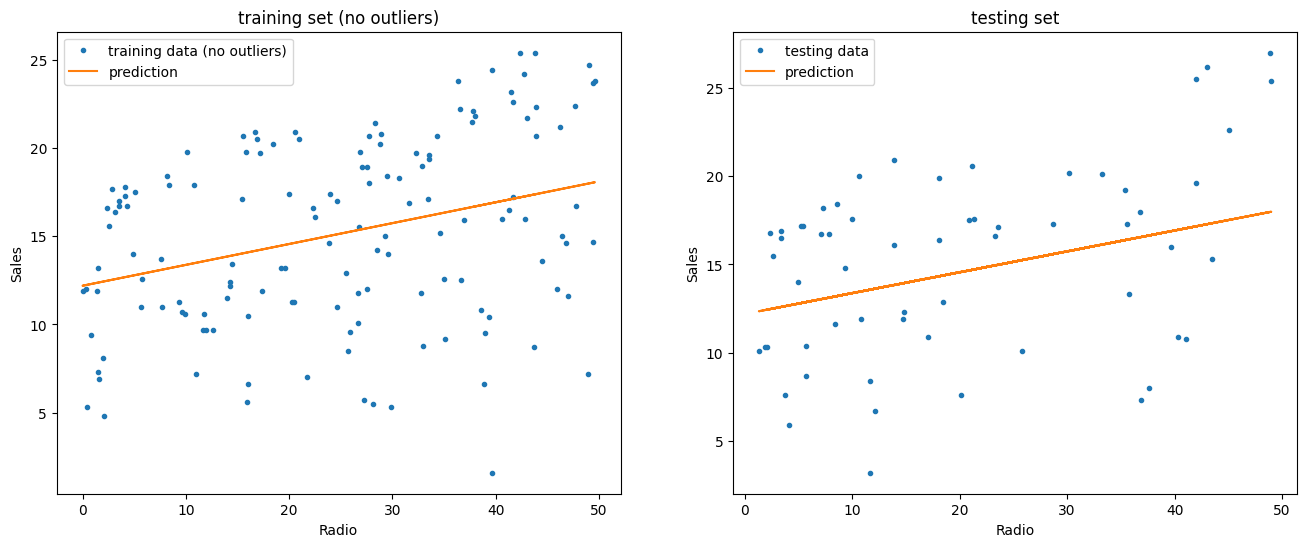

In [23]:
# YOUR CODE HERE
# 计算特征列的均值和标准差
mean_radio = np.mean(train_data['Radio'])
std_radio = np.std(train_data['Radio'])

# 定义阈值，通常是均值加减若干个标准差
threshold = 2 * std_radio

# 使用标准差方法删除离群值
train_data_no_outliers = train_data[(train_data['Radio'] >= mean_radio - threshold) & (train_data['Radio'] <= mean_radio + threshold)]

# 创建模型的实例
model_no_outliers = myLinearRegression()

# 使用训练集（去除离群值后）对模型进行训练
model_no_outliers.fit(train_data_no_outliers['Radio'], train_data_no_outliers['Sales'])

# 对测试集进行预测，并将结果存储在变量prediction中
prediction_no_outliers = model_no_outliers.predict(test_data['Radio'])

mae_no_outliers = MAE(prediction_no_outliers, test_data['Sales'])
rmse_no_outliers = RMSE(prediction_no_outliers, test_data['Sales'])

print("去除离群值后的模型，特征：Radio")
print("MAE:", mae_no_outliers)
print("RMSE:", rmse_no_outliers)

# 创建新的图
plt.figure(figsize=(16, 6))

# 创建子图1
plt.subplot(121)
plt.plot(train_data_no_outliers['Radio'].values, train_data_no_outliers['Sales'].values, '.', label='training data (no outliers)')
plt.plot(train_data_no_outliers['Radio'].values, model_no_outliers.predict(train_data_no_outliers['Radio']), '-', label='prediction')
plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title("training set (no outliers)")
plt.legend()

# 创建子图2
plt.subplot(122)
plt.plot(test_data['Radio'].values, test_data['Sales'].values, '.', label='testing data')
plt.plot(test_data['Radio'].values, prediction_no_outliers, '-', label='prediction')
plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title("testing set")
plt.legend()

plt.show()




模型4，特征：TV
MAE: 2.107510879156878
RMSE: 2.6135925902140853


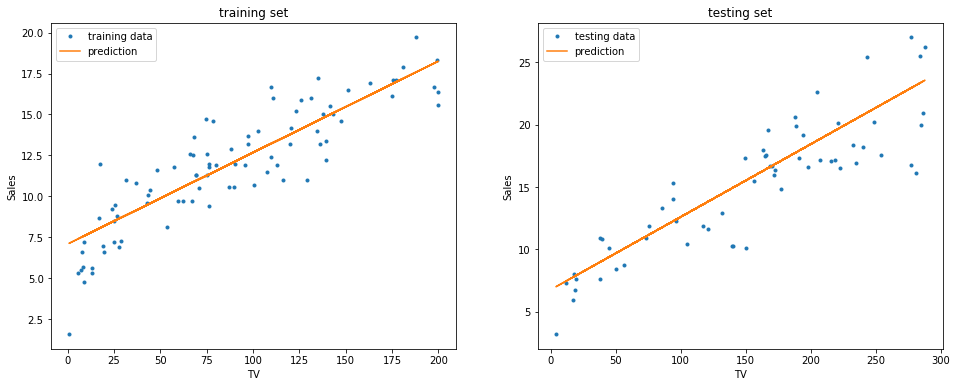

In [22]:
# YOUR CODE HERE


